In [90]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calmap

# The path to our CSV file(s)
holiday_file = "Resources/Holidays2010-2019.csv"
crash_file = "Resources/Metro_Nashville___Davidson_County_Traffic_Crashes__2019_.csv"

# Read our CSV data into pandas
df_holiday = pd.read_csv(holiday_file)
df_crash = pd.read_csv(crash_file)
df_holiday['Date']=pd.to_datetime(df_holiday['Date'])

In [91]:
# Test any date
# i.e. crashes_on_date(reduced_df,'01-06-2017')
def crashes_on_date(dataframe,date):
    seriesObj = dataframe.apply(lambda x: True if date in list(x) else False, axis=1)
    numOfRows = len(seriesObj[seriesObj == True].index)
    return(numOfRows)


In [92]:
# Function for querying a dataframe on a certain column value
# i.e. get_row_for_column(reduced_df,'Date','01/06/2017','Weather Description')
def get_row_for_column(dataframe,column,column_value,second_column_value):
    if column=='Date':
        found_rows = dataframe.loc[(
            pd.to_datetime(dataframe[column]) == pd.Timestamp(column_value))]
    else:
        found_rows = dataframe.loc[(
            dataframe[column] == column_value)]
    return(found_rows[second_column_value])


## Data Cleaning and Exploration

In [93]:
#Get row count for each column
df_crash.count()

Accident Number               284517
Date and Time                 284446
Number of Motor Vehicles      284346
Number of Injuries            284394
Number of Fatalities          284332
Property Damage               125606
Hit and Run                   284479
Reporting Officer             284389
Collision Type Code           284366
Collision Type Description    283841
Weather Code                  284085
Weather Description           284085
Illumination Code             284151
Illumination Description      284126
Harmful Code                  284516
Harmful Code Description      282897
Street Address                284327
City                          277819
State                         281799
ZIP                           274897
RPA                           270262
Precinct                      269411
Latitude                      272145
Longitude                     272139
Mapped Location               272136
dtype: int64

In [94]:
#Drop nan or blank only in date/time column
df_crash['Date and Time'].dropna()

0         01/02/2019 03:58:00 PM
1         01/10/2019 03:37:00 PM
2         02/05/2019 12:30:00 PM
3         02/11/2019 09:53:00 AM
4         02/17/2019 11:06:00 AM
                   ...          
284512    12/08/2009 09:10:00 PM
284513    04/30/2010 05:50:00 PM
284514    07/06/2014 12:45:00 PM
284515    05/19/2010 05:50:00 PM
284516    08/13/2013 12:00:00 AM
Name: Date and Time, Length: 284446, dtype: object

In [95]:
#Split date/time into separate date and time columns
new= df_crash["Date and Time"].str.split(" ", expand = True)
df_crash["Date"] = new[0]
df_crash["Time"] = new[1]+new[2]
df_crash.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,Date,Time
0,20190004211,01/02/2019 03:58:00 PM,2.0,0.0,0.0,NaN,N,256419,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5337.0,NORTH,NaN,NaN,NaN,01/02/2019,03:58:00PM
1,20190025356,01/10/2019 03:37:00 PM,3.0,0.0,0.0,NaN,N,256505,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5339.0,NORTH,NaN,NaN,NaN,01/10/2019,03:37:00PM
2,20190096838,02/05/2019 12:30:00 PM,2.0,0.0,0.0,NaN,N,267831,98.0,OTHER,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,02/05/2019,12:30:00PM
3,20190112437,02/11/2019 09:53:00 AM,3.0,0.0,0.0,NaN,N,591936,11.0,Front to Rear,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,02/11/2019,09:53:00AM
4,20190129966,02/17/2019 11:06:00 AM,2.0,0.0,0.0,NaN,Y,279116,4.0,ANGLE,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,02/17/2019,11:06:00AM


In [96]:
#Remove any rows dated before 2010
reduced_df = df_crash.loc[(
    pd.to_datetime(df_crash["Date"]) > pd.Timestamp('12/31/2009'))]
reduced_df['Date']=pd.to_datetime(reduced_df['Date'])

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
# Preview Dataframe
reduced_df.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,Date,Time
0,20190004211,01/02/2019 03:58:00 PM,2.0,0.0,0.0,NaN,N,256419,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5337.0,NORTH,NaN,NaN,NaN,2019-01-02,03:58:00PM
1,20190025356,01/10/2019 03:37:00 PM,3.0,0.0,0.0,NaN,N,256505,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5339.0,NORTH,NaN,NaN,NaN,2019-01-10,03:37:00PM
2,20190096838,02/05/2019 12:30:00 PM,2.0,0.0,0.0,NaN,N,267831,98.0,OTHER,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,2019-02-05,12:30:00PM
3,20190112437,02/11/2019 09:53:00 AM,3.0,0.0,0.0,NaN,N,591936,11.0,Front to Rear,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,2019-02-11,09:53:00AM
4,20190129966,02/17/2019 11:06:00 AM,2.0,0.0,0.0,NaN,Y,279116,4.0,ANGLE,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,2019-02-17,11:06:00AM


## Crashes by day Merging/Graphing/Parsing

In [97]:
# Count crashes per day and create dataframe
crashes_by_day=pd.DataFrame(reduced_df['Date'].value_counts()).reset_index()
crashes_by_day.columns=["Date","Crashes"]
crashes_by_day['Date'] =pd.to_datetime(crashes_by_day.Date)
crashes_by_day.sort_values(['Date'],inplace=True)
crashes_by_day.head()

,Date,Crashes
3253,2010-01-01,45
3508,2010-01-02,30
3467,2010-01-03,35
2520,2010-01-04,63
2074,2010-01-05,72


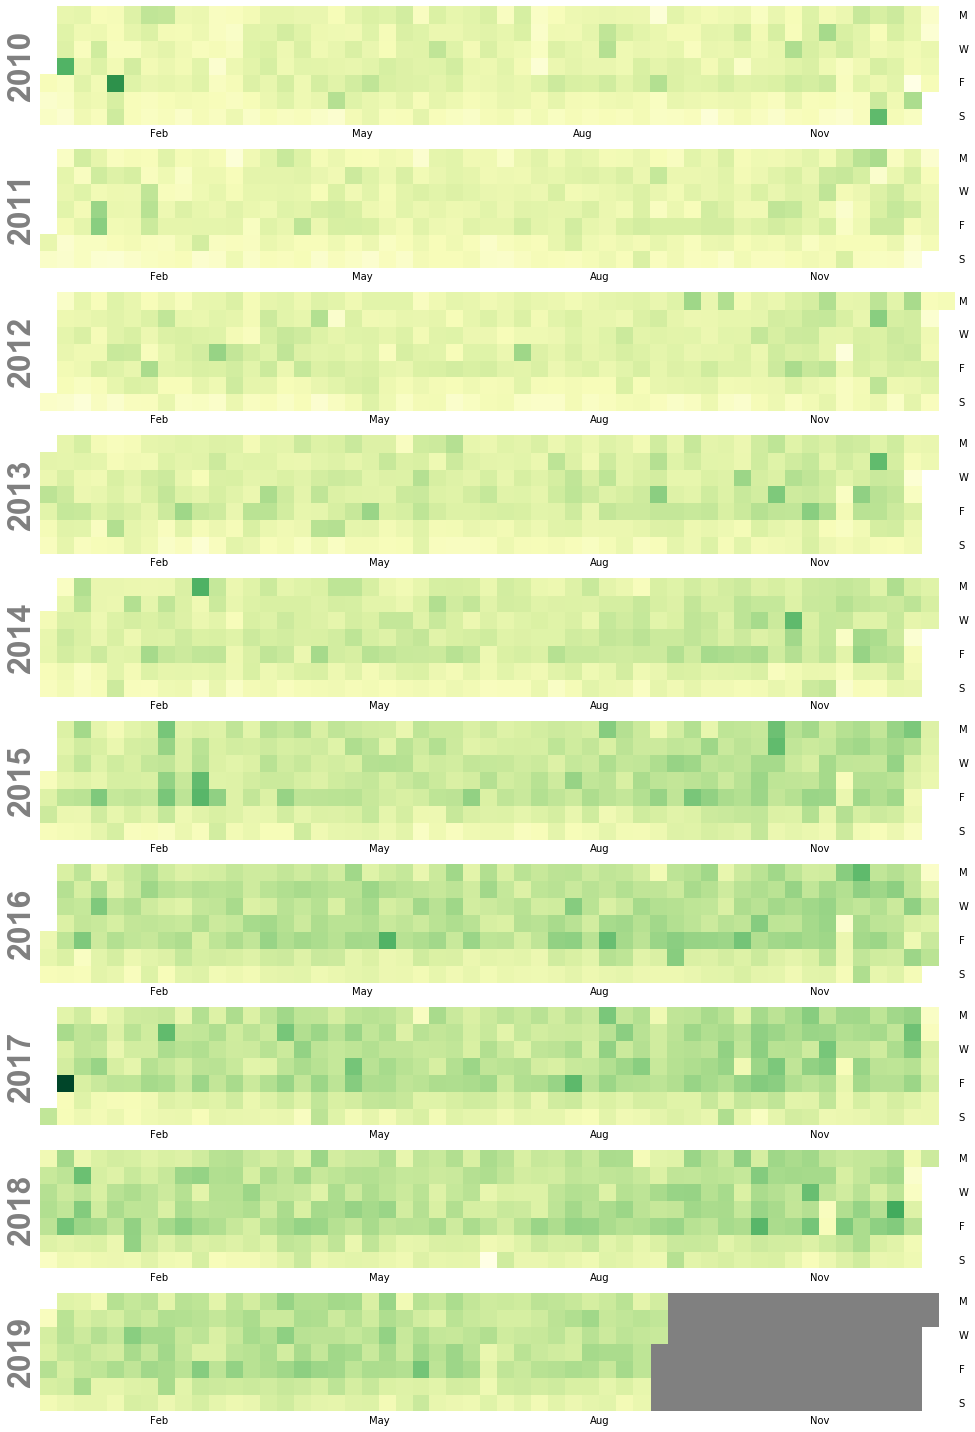

In [98]:
# Build heatmap calendar of crashes by day
crashes_by_day_series=crashes_by_day.set_index('Date')
events = pd.Series(crashes_by_day_series['Crashes'])

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(40, 20)))
plt.savefig('plots/crashes_by_day_heatmap.png')

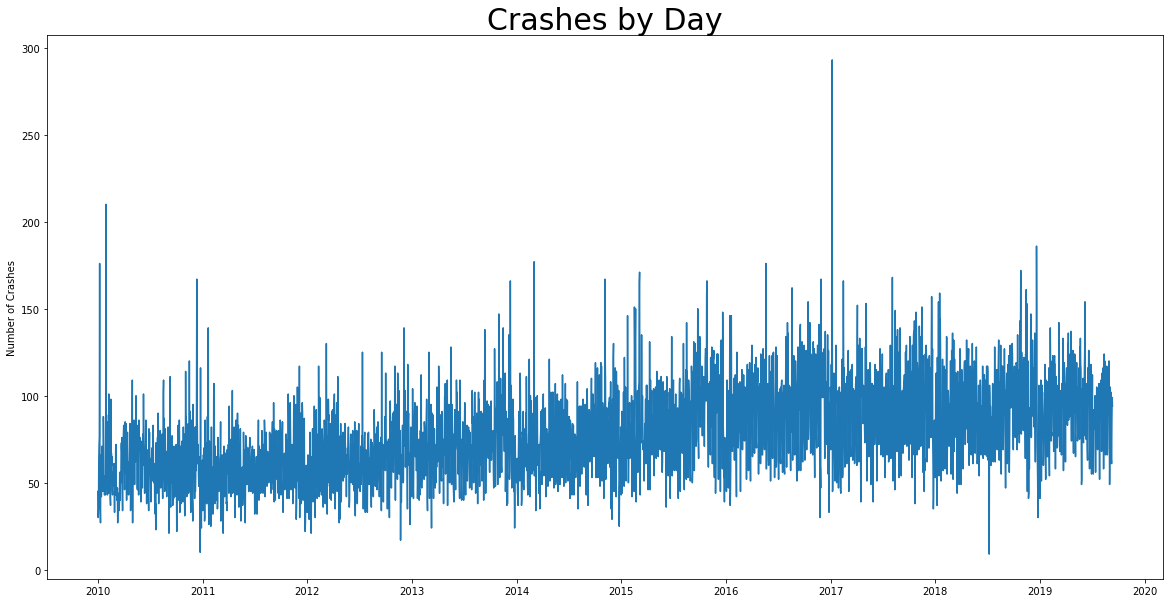

In [99]:
# Line graph of crashes by day
fig = plt.figure(figsize=(20,10))
plt.title("Crashes by Day",fontsize=30)
plt.ylabel("Number of Crashes")
plt.plot(crashes_by_day['Date'],crashes_by_day['Crashes'])
plt.savefig('plots/crashes_by_day.png')

## Merge Holidays with Main Dataset

In [100]:
# Merge holiday dataframe with main dataframe to both keep and exclude holiday/non-holidays
df_inner = pd.merge(reduced_df, df_holiday, on='Date', how='inner')
df_full_w_holiday = pd.merge(reduced_df, df_holiday, on='Date', how='outer')
df_inner['Holiday'].dropna()
df_inner.head()


,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,Date,Time,Holiday,Day
0,2010359258,04/22/2010 08:45:00 AM,2.0,5.0,0.0,N,N,226861,4.0,ANGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-22,08:45:00AM,Earth Day 2010,Thursday
1,2010360974,04/22/2010 09:30:00 PM,2.0,0.0,0.0,N,Y,562454,1.0,REAR END,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-22,09:30:00PM,Earth Day 2010,Thursday
2,2010359572,04/22/2010 11:20:00 AM,2.0,0.0,0.0,N,N,224412,9.0,UNKNOWN,...,37204,NaN,NaN,NaN,NaN,NaN,2010-04-22,11:20:00AM,Earth Day 2010,Thursday
3,2010360172,04/22/2010 03:40:00 PM,3.0,0.0,0.0,N,Y,676827,4.0,ANGLE,...,37076,9715.0,NaN,NaN,NaN,NaN,2010-04-22,03:40:00PM,Earth Day 2010,Thursday
4,2010359668,04/22/2010 12:22:00 PM,2.0,0.0,0.0,N,Y,226092,9.0,UNKNOWN,...,37207,2011.0,NaN,NaN,NaN,NaN,2010-04-22,12:22:00PM,Earth Day 2010,Thursday


## VUPD Officers

In [101]:
# How many reporting officers were VUPD
df_officer=reduced_df
df_officer=pd.DataFrame(df_officer['Reporting Officer'].dropna())
df_officer_vu=df_officer[df_officer['Reporting Officer'].str.contains('VUPD',na=False)]
len(df_officer_vu),len(df_officer)

(964, 282490)

## Weather Merging/Graphing/Parsing

In [102]:
# Group crashes by weather conditions
df_full_w_holiday['Weather Description'].dropna()
grouped_crashes_by_weather=pd.DataFrame(df_full_w_holiday['Weather Description'].value_counts()).reset_index()
grouped_crashes_by_weather.columns=['Weather','Crashes']
grouped_crashes_by_weather.head()


,Weather,Crashes
0,CLEAR,118825
1,NO ADVERSE CONDITIONS,94029
2,RAIN,37423
3,CLOUDY,24691
4,SNOW,3421


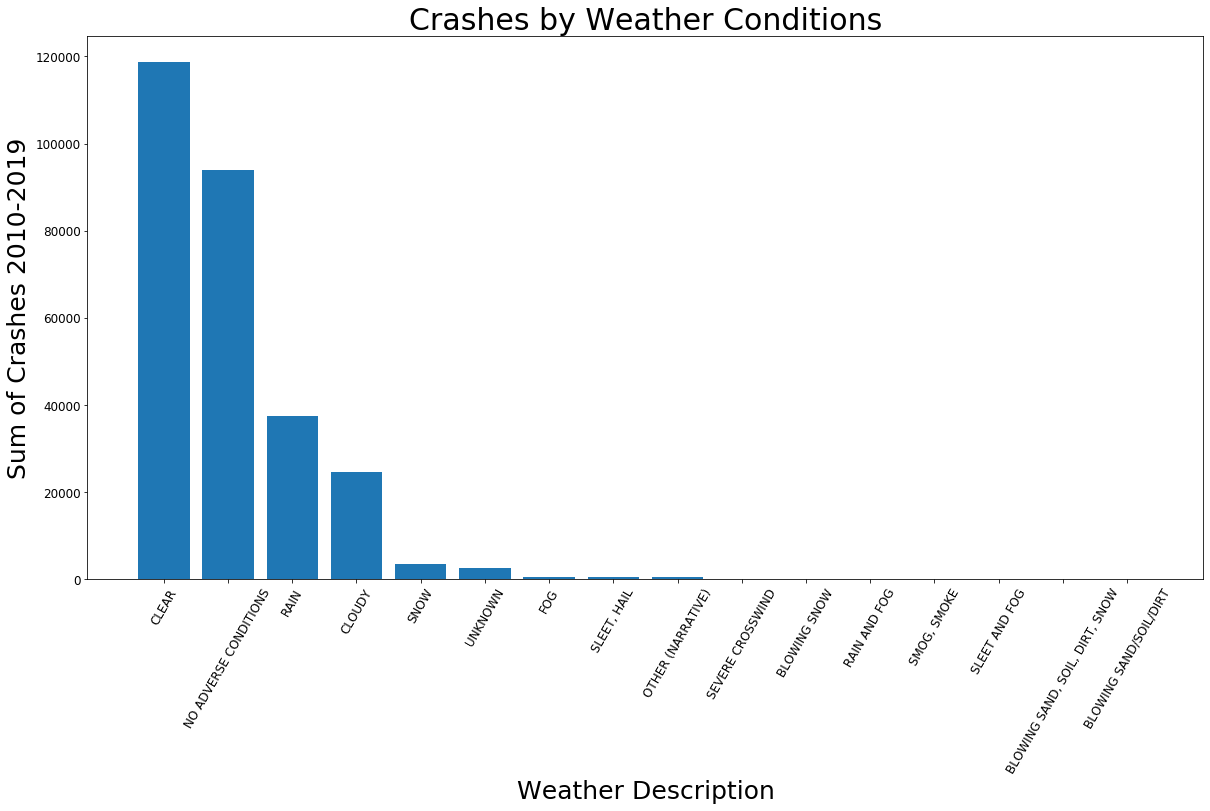

In [103]:
# Plot crashes by weather conditions
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
plt.title('Crashes by Weather Conditions',fontsize=30)
plt.ylabel('Sum of Crashes 2010-2019',fontsize=25)
plt.xlabel('Weather Description',fontsize=25)
plt.tick_params(labelsize=12)
plt.bar(grouped_crashes_by_weather['Weather'],grouped_crashes_by_weather['Crashes'])
plt.savefig('plots/crashes_by_weather.png')

## Crash Code Merging/Graphing/Parsing

In [105]:
# Pull 1st code from Harmful Code column
df_harmful_code = reduced_df
df_harmful_code['Harmful Code'].dropna(inplace=True)
df_harmful_code['Harmful Code Description'].dropna(inplace=True)
new= df_harmful_code["Harmful Code"].str.split(";", expand = True)
df_harmful_code["Harmful Code 1"] = new[0]

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
# Group crashes by code
grouped_crashes_by_code=pd.DataFrame(df_harmful_code['Harmful Code 1'].value_counts()).reset_index()
grouped_crashes_by_code.columns=['Crash Code','Crashes']
grouped_crashes_by_code.head()

,Crash Code,Crashes
0,12,222604
1,14,7867
2,30,4292
3,34,3672
4,24,3051


In [106]:
# Map code descriptions to codes
codes = grouped_crashes_by_code['Crash Code']
code_dict={}
for code in codes:
    code_dict[code]=pd.DataFrame(df_harmful_code.loc[df_harmful_code['Harmful Code']==code]['Harmful Code Description']).reset_index()

code_dict2={}
for code in codes:
    try:
        code_dict2[code]=code_dict[code]['Harmful Code Description'][0]
    except IndexError:
        pass

code_df=pd.DataFrame.from_dict(code_dict2,orient='index').reset_index()
code_df.columns=["Crash Code","Crash Description"]
code_df=pd.DataFrame(code_df.dropna())
code_df.head()

,Crash Code,Crash Description
0,12,MOTOR VEHICLE IN TRANSPORT
1,14,PARKED MOTOR VEHICLE
2,30,UTILITY POLE
3,34,DITCH
4,24,GUARDRAIL FACE


In [66]:
# Merge codes, descriptions, and crashes
df_inner_code = pd.merge(grouped_crashes_by_code, code_df, on='Crash Code', how='inner')
df_inner_code.head()

,Crash Code,Crashes,Crash Description
0,12,222604,MOTOR VEHICLE IN TRANSPORT
1,14,7867,PARKED MOTOR VEHICLE
2,30,4292,UTILITY POLE
3,34,3672,DITCH
4,24,3051,GUARDRAIL FACE


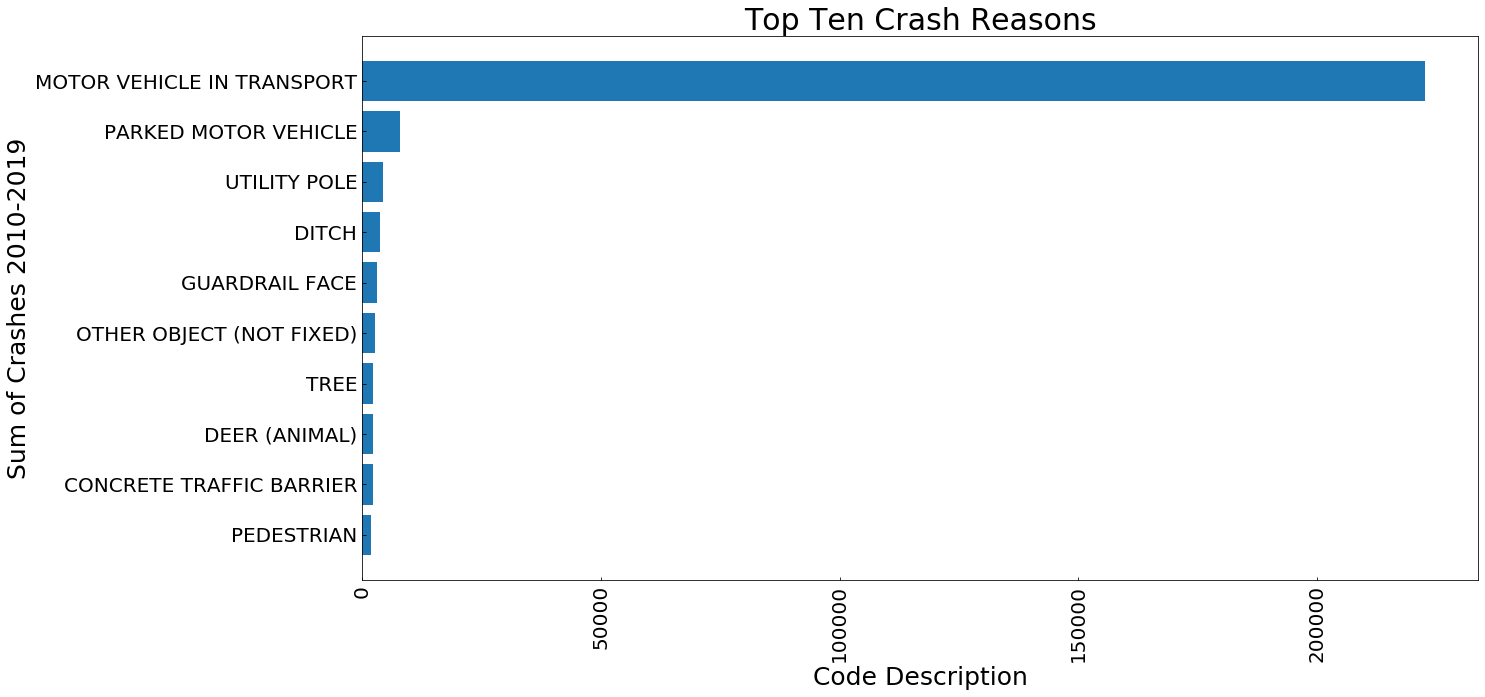

In [67]:
# Plot the crashes by code reason
fig,ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Top Ten Crash Reasons',fontsize=30)
plt.ylabel('Sum of Crashes 2010-2019',fontsize=25)
plt.xlabel('Code Description',fontsize=25)
plt.tick_params(axis="x", direction="in",pad=5,labelsize=20)
plt.tick_params(axis="y", direction="in",pad=5,labelsize=20)
ax.invert_yaxis()
plt.barh(df_inner_code['Crash Description'].head(10),df_inner_code['Crashes'].head(10))
plt.savefig('plots/crashes_by_code.png')

## Holiday Merging/Graphing/Parsing

In [107]:
# Build holiday dataframe with number of crashes
crashes_by_holiday=pd.DataFrame(df_inner['Holiday'].value_counts()).reset_index()
crashes_by_holiday.columns=['Holiday','Crashes']
crashes_by_holiday.sort_values(['Holiday'],inplace=True)
crashes_by_holiday.head()


,Holiday,Crashes
121,April Fool's Day 2010,83
175,April Fool's Day 2011,72
347,April Fool's Day 2012,44
184,April Fool's Day 2013,70
138,April Fool's Day 2014,80


In [108]:
# Find mean crashes on holidays vs. non-holidays
df_no_holiday = df_full_w_holiday[~df_full_w_holiday['Holiday'].isin(df_holiday['Holiday'])]
crashes_by_day_no_holiday=pd.DataFrame(df_no_holiday['Date'].value_counts()).reset_index()
crashes_by_day_no_holiday.columns=["Date","Crashes"]

crashes_per_day_on_holidays=round(crashes_by_holiday['Crashes'].mean(),2)
crashes_per_day_not_holidays=round(crashes_by_day_no_holiday['Crashes'].mean(),2)
crash_mean_data=[[crashes_per_day_on_holidays,crashes_per_day_not_holidays]]
crashes_on_noton_holiday_df=pd.DataFrame(crash_mean_data,columns=['Mean Crashes on a Holiday','Mean Crashes not on a Holiday'])
crashes_on_noton_holiday_df



,Mean Crashes on a Holiday,Mean Crashes not on a Holiday
0,71.74,81.0


In [110]:
# Create dataframe with holiday name and crashes
new_holiday=crashes_by_holiday["Holiday"].str.split(" 2", expand = True)
crashes_by_holiday["Holiday Name"] = new_holiday[0]
crashes_by_holiday["Year"] = "2"+new_holiday[1]
crashes_by_holiday['Holiday Name'].head()
grouped_crashes_by_holiday=crashes_by_holiday.groupby(['Holiday Name']).sum()

grouped_crashes_by_holiday=pd.DataFrame(grouped_crashes_by_holiday).reset_index()
grouped_crashes_by_holiday=grouped_crashes_by_holiday.sort_values(['Crashes'],ascending=False)
grouped_crashes_by_holiday['Holiday Name']=grouped_crashes_by_holiday['Holiday Name'].replace({'Patriot Day or September 11th': 'Patriot Day', 'Presidents Day and Washington\'s Birthday': 'Presidents Day', 'Pearl Harbor Remembrance Day': 'Pearl Harbor Day', 'Martin Luther King Day': 'MLK Day'})
grouped_crashes_by_holiday.head()

,Holiday Name,Crashes
10,Daylight Saving,1009
9,Cyber Monday,946
27,Native American Day,937
40,Valentine's Day,917
6,Cinco de Mayo,903


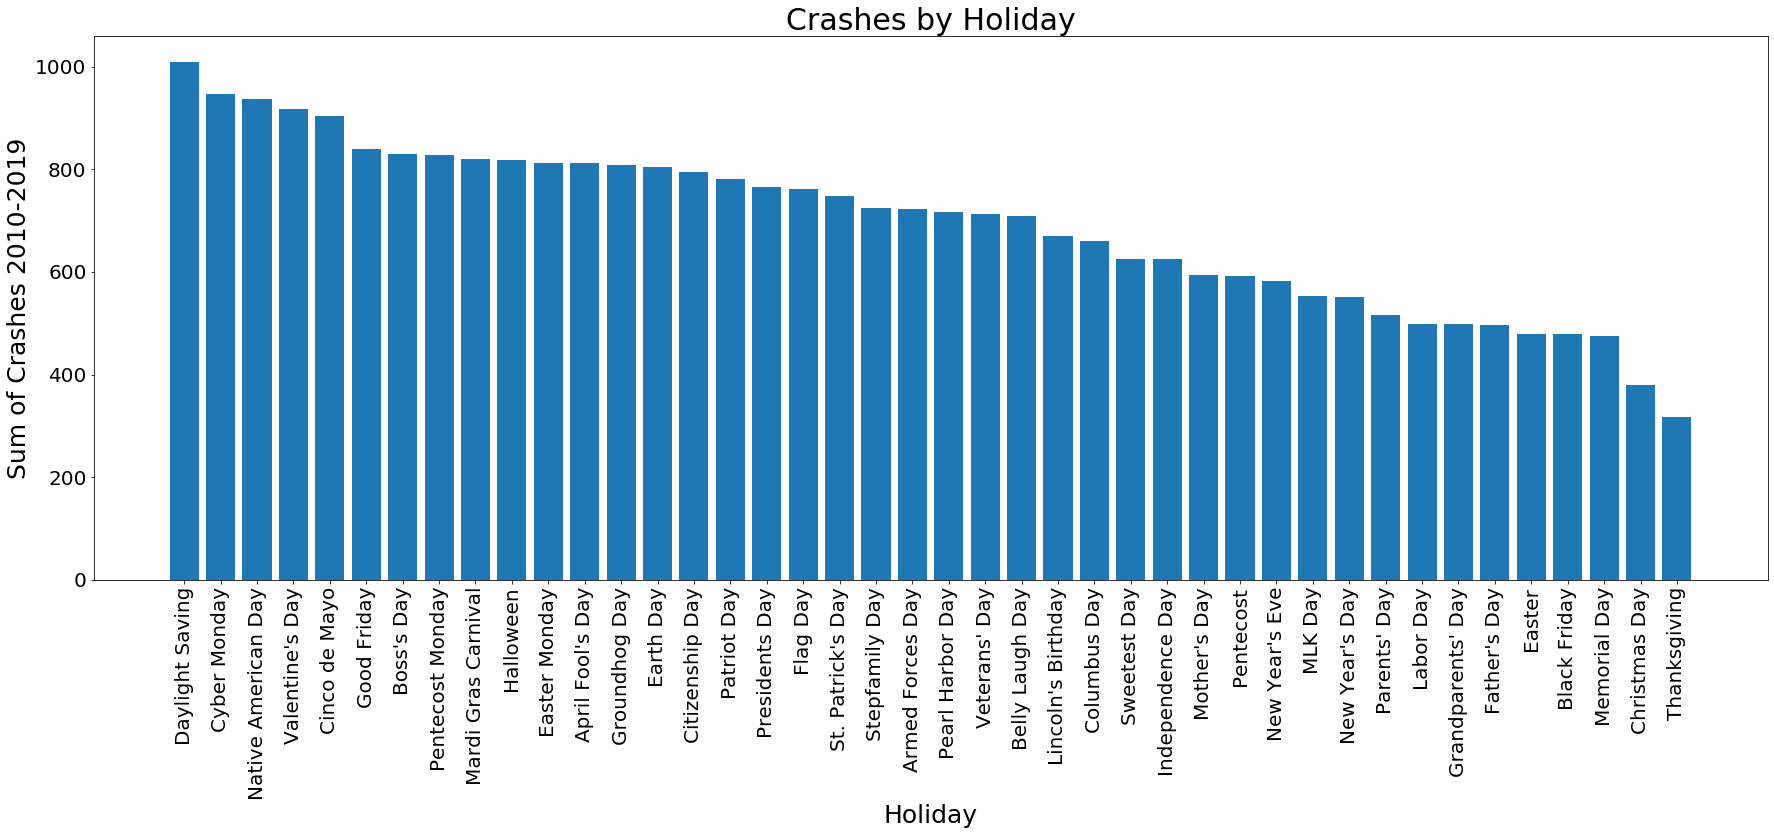

In [111]:
# Graph crashes by holiday
fig = plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title('Crashes by Holiday',fontsize=30)
plt.ylabel('Sum of Crashes 2010-2019',fontsize=25)
plt.xlabel('Holiday',fontsize=25)
plt.tick_params(labelsize=20)
plt.bar(grouped_crashes_by_holiday['Holiday Name'],grouped_crashes_by_holiday['Crashes'])
plt.savefig('plots/crashes_by_holiday.png')

In [112]:
# Create list of "main" holidays
main_holidays=['Christmas Day','Thanksgiving','New Year\'s Day','New Year\'s Eve','Independence Day','Easter','Labor Day']
specific_holidays={}
for holiday in main_holidays:
    specific_holidays[holiday]=grouped_crashes_by_holiday.loc[(
        grouped_crashes_by_holiday['Holiday Name'] == holiday)]
specific_holidays['New Year\'s Eve']

,Holiday Name,Crashes
29,New Year's Eve,583


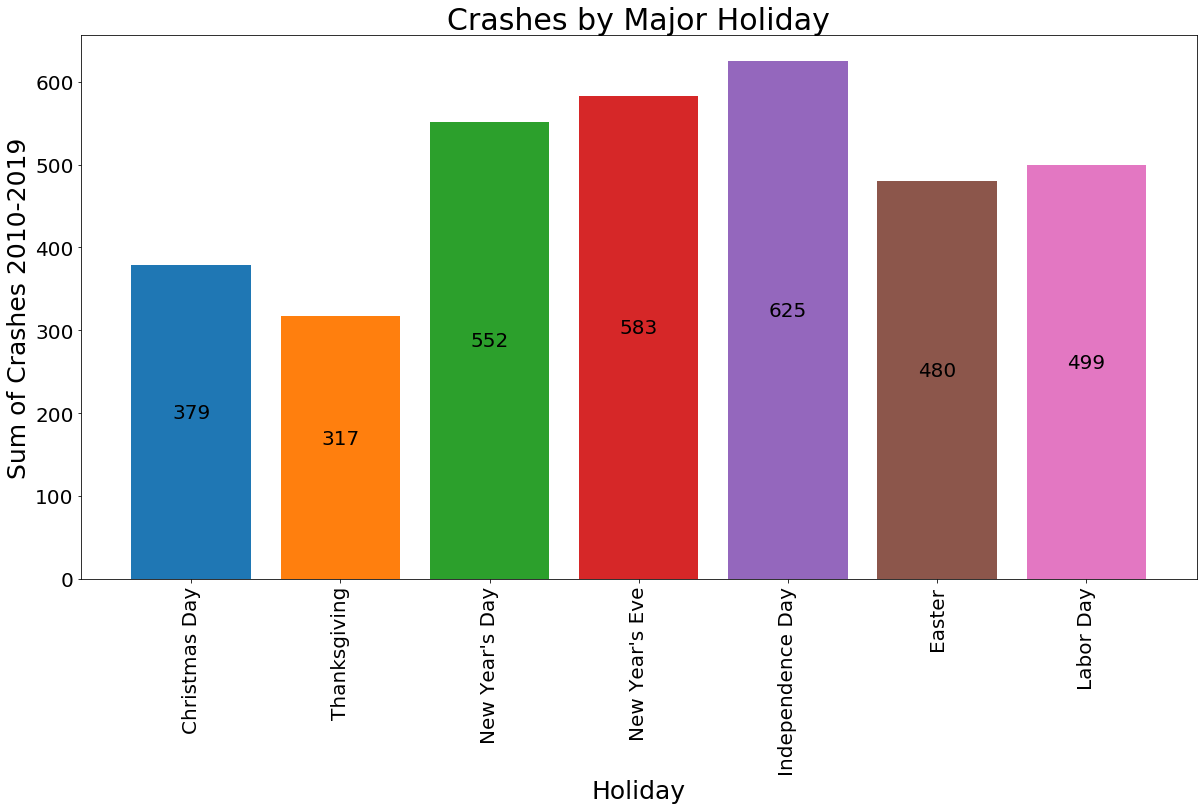

In [113]:
# Graph crashes by major holiday
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., .5*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=20)

fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Crashes by Major Holiday',fontsize=30)
plt.ylabel('Sum of Crashes 2010-2019',fontsize=25)
plt.xlabel('Holiday',fontsize=25)
plt.tick_params(labelsize=20)
#values=specific_holidays[holiday]['Crashes']
rects=[]
values=[]
for holiday in main_holidays:
    values=specific_holidays[holiday]['Crashes']
    #plt.bar(specific_holidays[holiday]['Holiday Name'],specific_holidays[holiday]['Crashes'])
    rects=plt.bar(specific_holidays[holiday]['Holiday Name'], values, width=0.8)
    autolabel(rects)



plt.savefig('plots/crashes_by_major_holiday.png')